In [32]:
!pip install statsmodels


In [33]:
!pip install pygam

In [34]:
!pip install shap

In [385]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler as StSc
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import KFold, cross_val_score,train_test_split,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score , mean_squared_error,accuracy_score
from sklearn.cross_decomposition import PLSRegression
from joblib import Parallel, delayed
from pygam import LinearGAM, s
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

In [36]:
df = pd.read_csv(r'C:\Users\sankh\DATASCIENCE\house sales in king county\kc_house_data.csv')
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [37]:
X = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15']
Y = ['price']
Y_val = df[Y]
X_val = df[X]
print(X_val)
print(Y_val)

    

    

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

VISUALISING THE DATA FOR OUTLIERS AND REMOVING THEM-->

1) BOX PLOTS -->

{'whiskers': [<matplotlib.lines.Line2D at 0x2e8d7e82310>,
 'caps': [<matplotlib.lines.Line2D at 0x2e8d7e81910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e8d7e81b90>,
 'medians': [<matplotlib.lines.Line2D at 0x2e8d7e945d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2e8d7e94dd0>,
 'means': []}

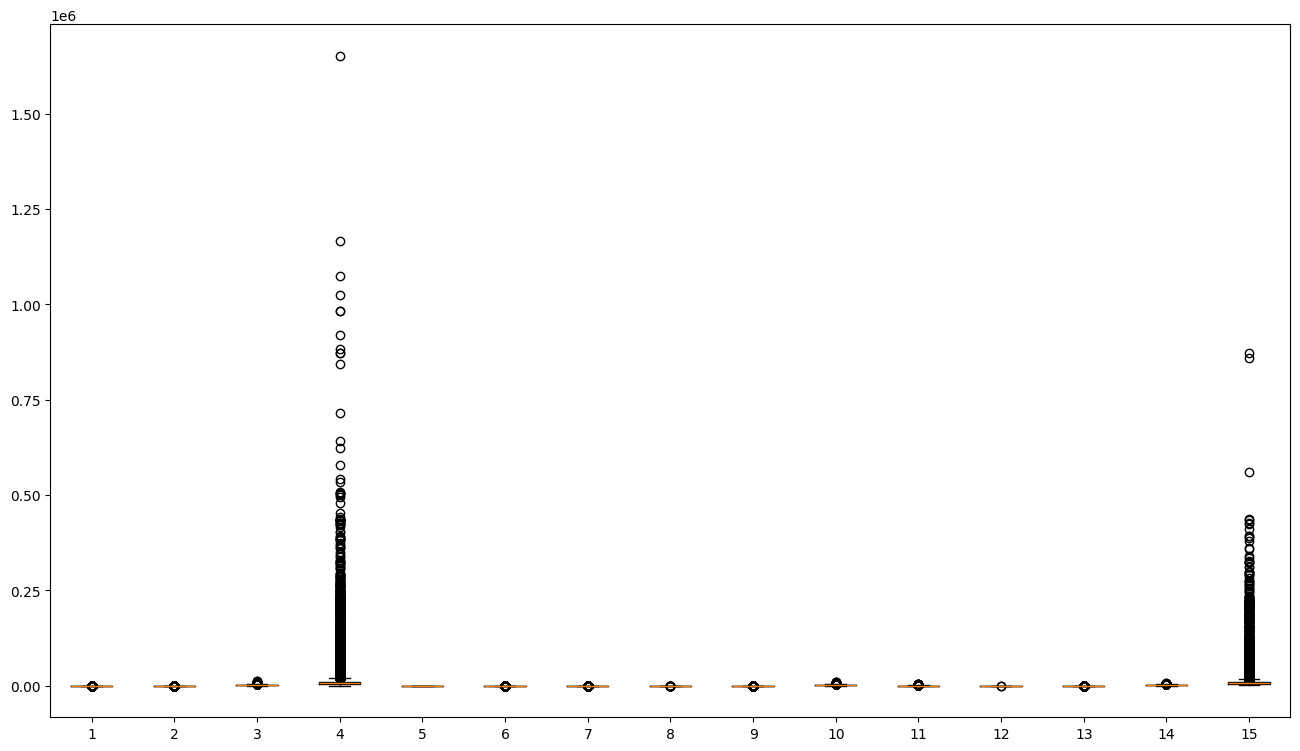

In [38]:
plt.figure(figsize=(16,9))
plt.boxplot(X_val)

HERE WE CAN SEE OUTLIERS, BUT IN ACTUAL , THEY ARE NOT OUTLIERS BECAUSE THESE PLOTS DO NOT TAKE IN ACCOUNT FOR OTHER PREDICTORS, I.E , INFLUENCE OF OTHER PREDICTORS.

2) Z-SCORE

In [39]:
def remove_outliers(df, y, columns):
    for col in columns:
        mean = np.mean(df[col])
        std_dev = np.std(df[col])
        z = (df[col] - mean) / std_dev
        outliers = np.abs(z) > 3
        df_filtered = df[~outliers]  
        y_filtered = y[~outliers]
        df_filtered.reset_index(drop=True, inplace=True)
        y_filtered.reset_index(drop=True, inplace=True)
        
    return df_filtered, y_filtered      
            
        
X_val_clean , Y_val_clean = remove_outliers(X_val,Y_val,X)
print(X_val_clean)
print(Y_val_clean)
print(np.size(X_val_clean['bathrooms']))
print(np.size(Y_val_clean))



       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21245         3       2.50         1530      1131     3.0           0     0   
21246         4       2.50         2310      5813     2.0           0     0   
21247         2       0.75         1020      1350     2.0           0     0   
21248         3       2.50         1600      2388     2.0           0     0   
21249         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

VISUALIZING EACH PREDICTOR'S KDE(KERNAL DENSITY) PLOT

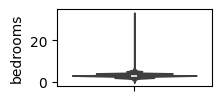

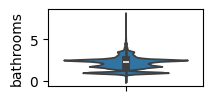

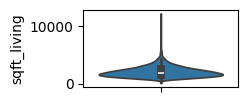

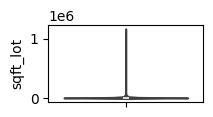

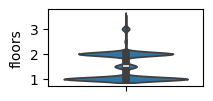

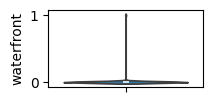

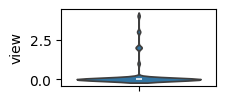

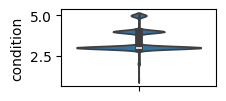

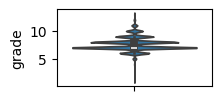

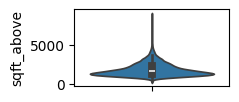

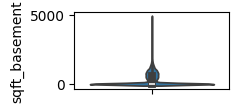

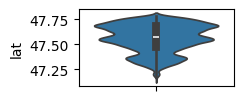

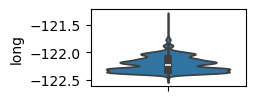

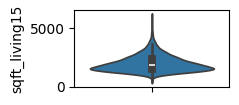

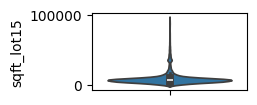

<Axes: >

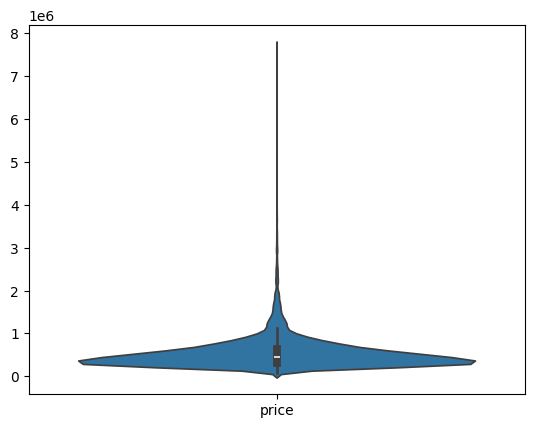

In [40]:
for i in range(np.size(X)):
    plt.figure(figsize=(2,1))
    sns.violinplot(X_val_clean[X[i]])
    plt.show()
sns.violinplot(Y_val_clean)

In [41]:
print(np.size(X_val_clean['bedrooms']))

21250


CHECKING MULTI-COLLINEARITY AMONG THE PREDICTORS -->

CORRELATION MATRIX 

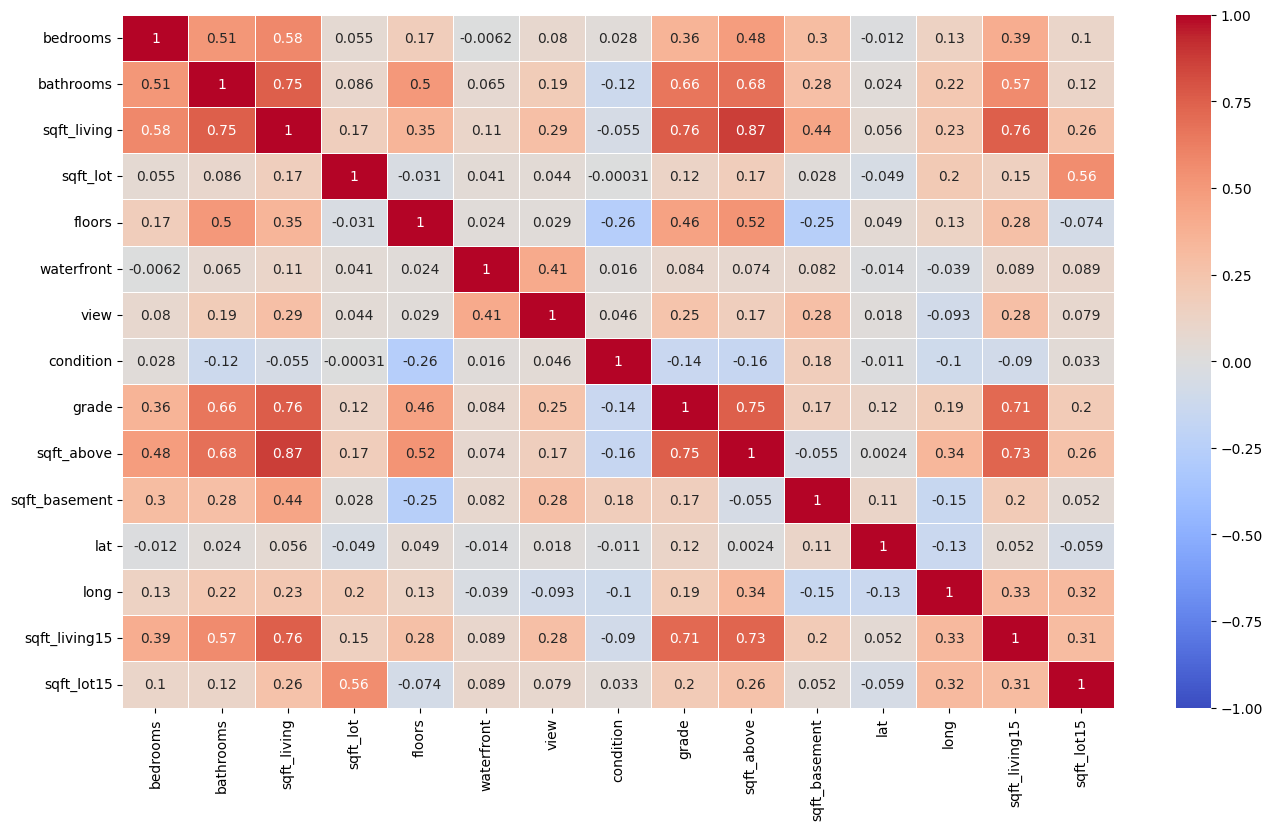

In [42]:
correlation_matrix = X_val_clean.corr()
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,linewidth=0.5)
plt.show()

THIS MATRIX SHOWS A STRONG CORRELATION BETWEEN THE PREDICTORS (SQFT_LIVING,SQFT_ABOVE)

USING VARIANCE INFLATION FACTOR (VIF)

In [43]:
vif_data = []
for i in range(0,len(X)):
    vif_data.append(variance_inflation_factor(X_val_clean,i))
print(vif_data)

C:\Users\sankh\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


[23.261233150618505, 24.915809697971312, inf, 1.7572691845603299, 16.8694478079665, 1.222595382813958, 1.5280373335666624, 31.459053343177786, 139.6100514359029, inf, inf, 120383.39396704623, 119690.20285399728, 27.380486993935204, 3.178545975298037]


THIS SUGGESTS THAT PREDICTORS----->SQFT_LIVING , SQFT_ABOVE AND SQFT_BASEMENT CAN BE WRITTEN PERFECTLY AS LINEAR COMBINATION OF OTHER PREDICTORS
THEREFORE IT IS BETTER TO EITHER TRANSFORM THEM OR REMOVE THEM
HERE, WE WILL NOT REMOVE THEM AS IT MIGHT HAPPEN THAT THESE VARIABLES MAY BE EXPLAINING THE VARIABILITY IN THE DATA, INFACT IT IS EXPLAINING(CHECKED), THEREFORE WE WOULD TRY TO TRANSFORM OR ADD INTERACTION TERM WHEN DEALING IWTH POLYREGRESSION.


THERE ARE FURTHER ANALYSIS WHICH CAN BE DONE LIKE AUTOCORRELATIONS(RELATIONSHIP BETWEEN IRREDUCIBLE ERRORS) , BUT IT IS MAINLY DONE WHEN DEALING WITH TIME SERIES, HERE NO NEED TO CHECK THAT AS OBSERVATIONS ARE INDEPENDENT OF EACH OTHER

ATLAST, WE CAN CAN VISUALIZE THE DATA BY PLOTTING PAIRPLOTS AND HOW PREDICTOR FEATURES ARE DEPENDENT ON EACH OTHER

<Figure size 640x480 with 0 Axes>

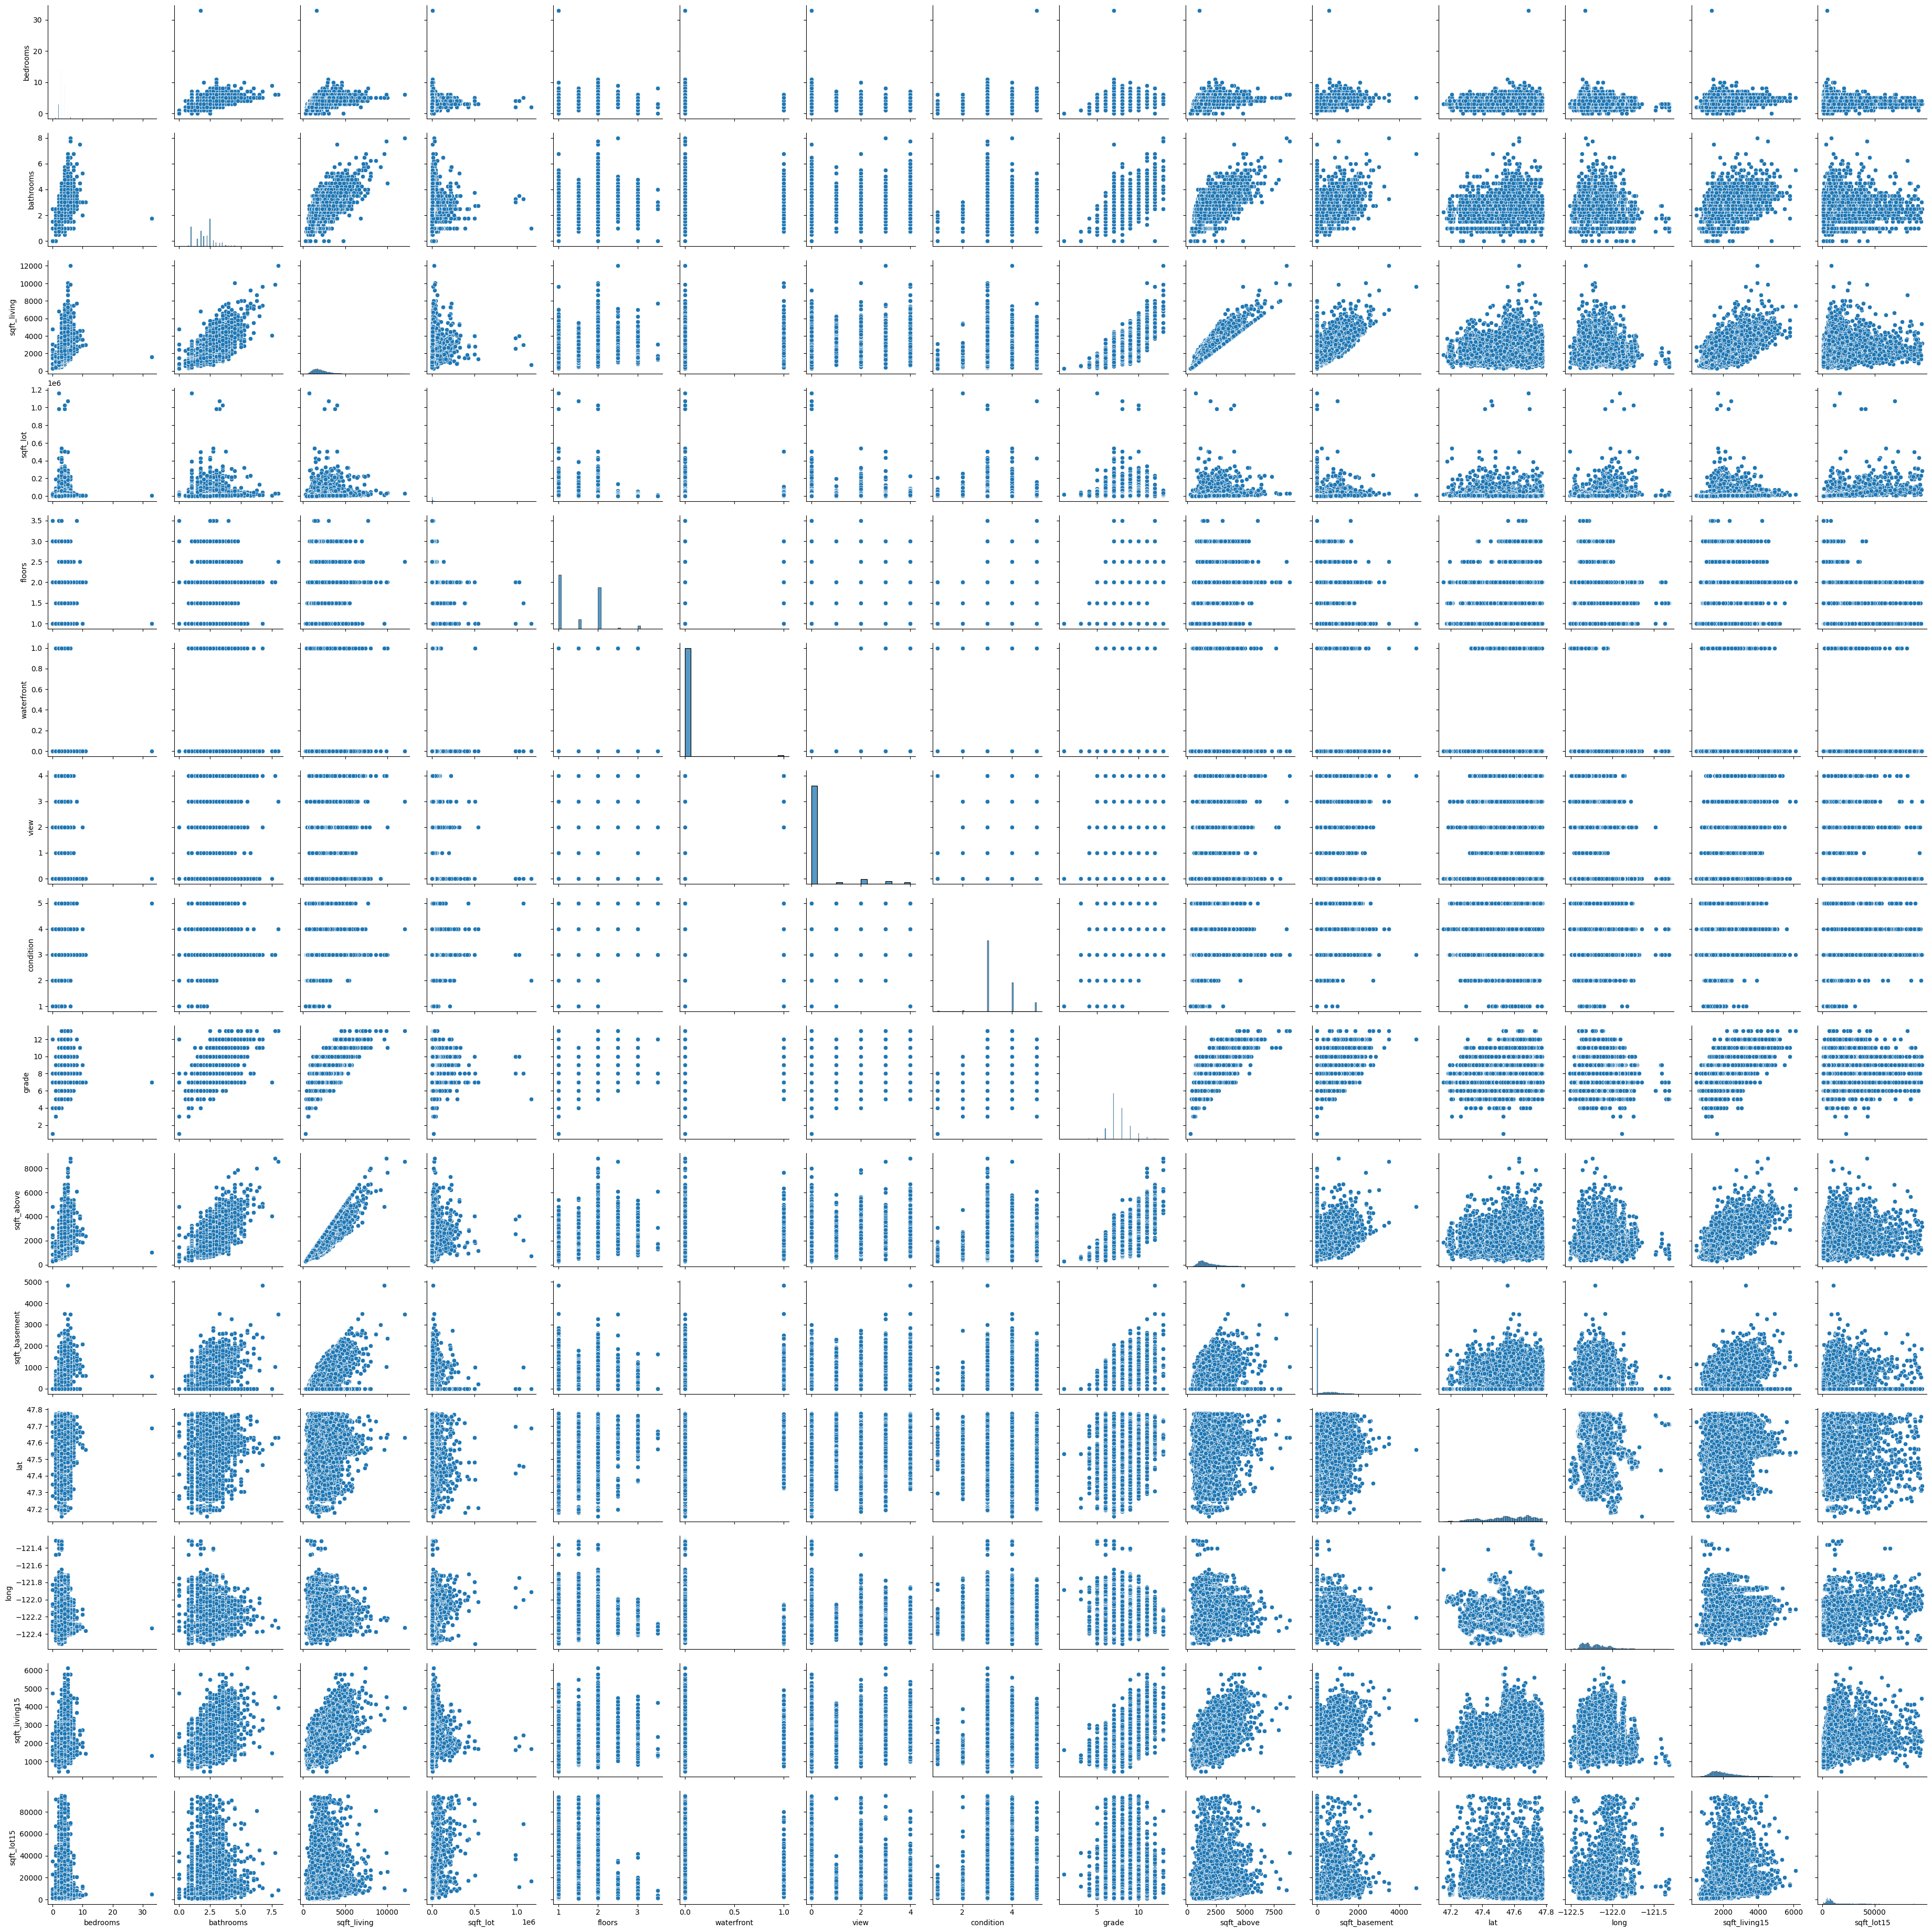

In [151]:
plt.figure()
sns.pairplot(X_val_clean, kind='scatter', markers='o')
plt.show()

NOW WE WILL STANDARDIZE OUR DATA AS WE HAVE REMOVED OUR OUTLIERS -->

In [44]:
def scale(x):
    scaler = StSc()
    x_scale= scaler.fit_transform(x)
    return x_scale
X_clean_scaled= pd.DataFrame(scale(X_val_clean))
print(X_clean_scaled)
#ADDING THE INTERCEPT TERM
X_clean_scaled_= np.c_[np.ones(X_clean_scaled.shape[0]),X_clean_scaled]
theta = np.zeros((X_clean_scaled_.shape[1],1))
print(X_clean_scaled_)
print(theta)

             0         1         2         3         4         5       6   \
0     -0.399878 -1.447698 -0.981833 -0.234793 -0.912861 -0.087101 -0.3027   
1     -0.399878  0.182005  0.554534 -0.175380  0.937151 -0.087101 -0.3027   
2     -1.474139 -1.447698 -1.435006 -0.072452 -0.912861 -0.087101 -0.3027   
3      0.674383  1.159827 -0.119699 -0.259051 -0.912861 -0.087101 -0.3027   
4     -0.399878 -0.143935 -0.429183 -0.144106 -0.912861 -0.087101 -0.3027   
...         ...       ...       ...       ...       ...       ...     ...   
21245 -0.399878  0.507946 -0.594978 -0.403441  2.787162 -0.087101 -0.3027   
21246  0.674383  0.507946  0.267156 -0.228710  0.937151 -0.087101 -0.3027   
21247 -1.474139 -1.773638 -1.158681 -0.395268  0.937151 -0.087101 -0.3027   
21248 -0.399878  0.507946 -0.517607 -0.356530  0.937151 -0.087101 -0.3027   
21249 -1.474139 -1.773638 -1.158681 -0.405494  0.937151 -0.087101 -0.3027   

             7         8         9         10        11        12        13

APPLYING OUR GRADIENT DESCENT MODEL -->

[[538584.33017998]
 [-28282.37668809]
 [  6468.45382979]
 [ 89902.23915792]
 [  5795.54110829]
 [-14880.48219233]
 [ 53009.10300383]
 [ 44309.11710777]
 [ 35103.20748148]
 [ 90920.11105502]
 [ 83252.03841676]
 [ 30668.10572429]
 [ 89097.54866185]
 [-34500.94538967]
 [ 23350.81095162]
 [-15311.22602509]]


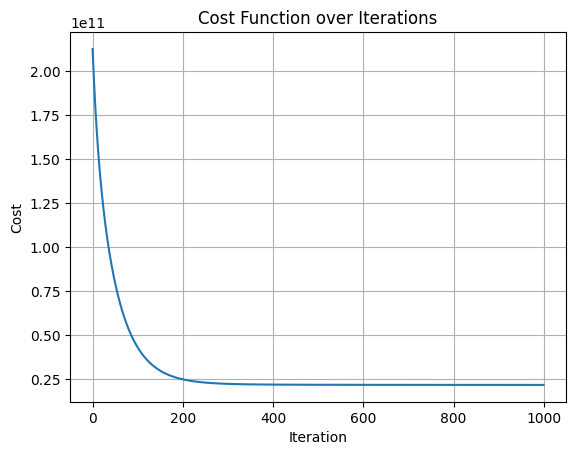

In [45]:
cost_history =[]
def gradient_descent(x,y,t):
    m = y.size
    alpha = 0.01
    num_iterators = 1000
    for _ in range(num_iterators):
        pred_val = x.dot(t)
        error = y -  pred_val
        slope = (1 / m) * x.T.dot(error)
        t = t + alpha*(slope)
        cost = (1 / (2 * m)) * np.sum(np.square(error))
        cost_history.append(cost)   
    return t
X_clean_scaled_ = np.array(X_clean_scaled_)
Y_val_clean = np.array(Y_val_clean).reshape(-1, 1)
theta_model = gradient_descent(X_clean_scaled_,Y_val_clean,theta)
print(theta_model)
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.grid(True)
plt.show()

In [46]:
def prediction(x,t):
    return x.dot(t)
print(Y_val_clean)
Y_pred = prediction(X_clean_scaled_,theta_model)
print(Y_pred)
print("r2 score :", r2_score(Y_val_clean, Y_pred))

[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
[[254278.89977236]
 [665086.03276726]
 [309624.29050464]
 ...
 [280689.32339334]
 [378382.59665181]
 [281414.47767564]]
r2 score : 0.6748415504204528


PLOTTING RESIDUAL CURVE FOR ANALYSING OUR LINEAR MODEL

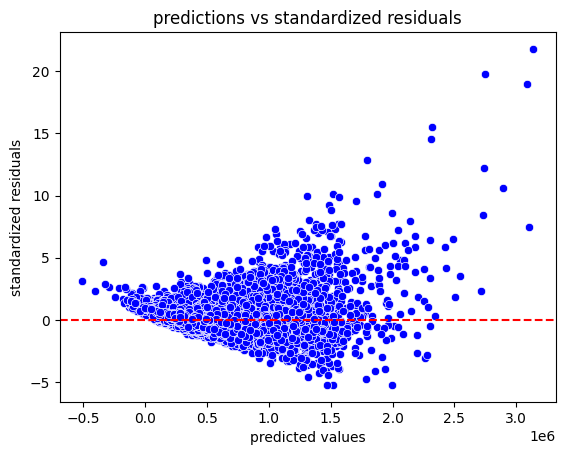

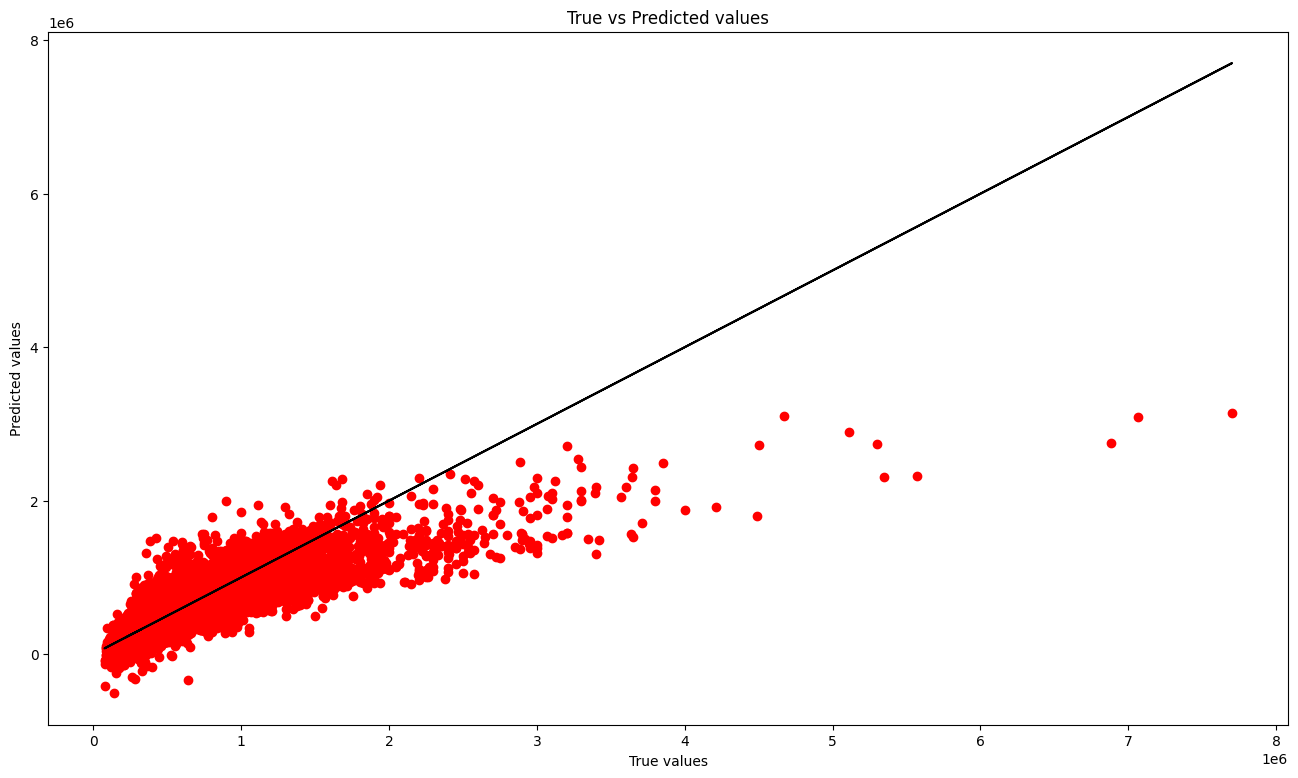

In [62]:
def residuals(y,pred):
    return y-pred
def residual_curve(y,pred):
    res = y-pred
    standard_residuals=stats.zscore(res)
    plt.figure()
    sns.scatterplot(x=pred,y=standard_residuals,color='b')
    plt.axhline(y=0, color='r', linestyle='--', label='y = 0')
    plt.title('predictions vs standardized residuals')
    plt.xlabel('predicted values')
    plt.ylabel('standardized residuals')
    plt.show()
residual_curve(Y_val_clean.flatten(),Y_pred.flatten())
plt.figure(figsize=(16,9))
plt.scatter(Y_val_clean,Y_pred,color='r')
plt.plot(Y_val_clean,Y_val_clean,color='black')
plt.title('True vs Predicted values')
plt.xlabel("True values")
plt.ylabel('Predicted values')
plt.show()

NOW, WE WILL PERFORM HYPOTHESIS TESTING FOR THE COEFFICIENTS WE HAVE OBTAINED ABOVE

WE WILL DO THIS BY PERFORMING F-STATISTIC TEST

In [48]:
TSS = np.sum((Y_val_clean-np.mean(Y_val_clean))**2)
RSS = np.sum((Y_val_clean-Y_pred)**2)
print(((TSS-RSS)/np.size(Y_val_clean))/((RSS)/(np.size(Y_val_clean))-np.size(theta_model)-1))

2.075423694370767


IT IS MUCH GREATER THAN 1 , THEREFORE REJECTING THE NULL HYPOTHESIS OF ALL COEFFICIENTS TO BE ZERO IN TRUE PREDICTOR FUNCTION

WE WILL TRY TESTING OUR MODEL , FOR AN INDIVIDUAL TEST DATA GIVEN

In [49]:
def standardize_test_input(test,x):
    scaler = StSc()
    scaler.fit(x)                      
    test_ = scaler.transform([test])
    return test_
test = np.array([3,1,1180,5650,1,0,0,3,7,1180,0,47.5112,-122.257,1340,5650])
x = standardize_test_input(test,X_val_clean)
x = np.c_[[1],x]
print(prediction(x,theta_model))

[[254278.89977236]]


C:\Users\sankh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


WOAH! IT IS PREDICTING DATA WHICH IS NOT ODD, OFCOURSE IT WONT BE THAT ACCURATE , BECAUSE MODEL'S R2 IS 0.67.

MODEL'S R2 SCORE IS 0.67. BUT THE POINT IS, THIS R2 SCORE IS FOR MODEL WHICH IS GENERATED BY TRAINING SET OF DATA, WE WANT TO CHECK ITS ACCURACY ON THE TEST DATA SET WHICH IS EXACTLY THE MAIN CONCERN. 
THEREFORE WE WILL USE CROSS VALIDATION TECHNIQUE FOR CALCULATING MODEL'S ACCURACY FOR TEST DATA.
HERE, CROSS VALIDATION CODE IS CODED IN SUCH A WAY THAT IT CAN BE USED FOR FURTHER REGULARISATION TECHNIQUES AS WELL ;)

In [50]:
def kfold_cv(folds,x,y,t,l):
    fold_size = int(np.size(y)/folds)
    r2_scores=[]
    r2_scores_ridge=[]
    r2_scores_lasso=[]

    for i in range(folds):
        val_start = i * fold_size
        val_end = (i+1) * fold_size
        X_test = x[val_start:val_end]
        Y_test = y[val_start:val_end]
        X_train = np.concatenate([x[:val_start],x[val_end:]],axis = 0)
        Y_train = np.concatenate([y[:val_start],y[val_end:]],axis = 0)
        if l==0:
            theta_cv = gradient_descent(X_train,Y_train,t)
            pred_test = np.dot(X_test,theta_cv)
            r2= r2_score(Y_test,pred_test)
            r2_scores.append(r2)
        else:
            theta_cv_ridge = gradient_descent_ridge(X_train,Y_train,t,l)
            theta_cv_lasso = gradient_descent_lasso(X_train,Y_train,t,l)
            pred_test_ridge = np.dot(X_test,theta_cv_ridge)
            pred_test_lasso = np.dot(X_test,theta_cv_lasso)
            r2_ridge= r2_score(Y_test,pred_test_ridge)
            r2_scores_ridge.append(r2_ridge)
            r2_lasso= r2_score(Y_test,pred_test_lasso)
            r2_scores_lasso.append(r2_lasso)
       
       
    return np.mean(r2_scores) if l==0 else np.mean(r2_scores_ridge),np.mean(r2_scores_lasso)
kfold_cv(10,X_clean_scaled_,Y_val_clean,theta_model,0)

C:\Users\sankh\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sankh\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(0.67124476379759, nan)

WELL, IT IS NOT THAT BAD FOR TEST DATA AS WELL, VALUE IS ALMOST THE SAME AS TRAINING DATA.

WHATEVER WE DID SO FAR, WAS PREDICTING THE FUNCTION FROM THE BLACK-BOX WHICH IS AS CLOSE TO THE TRUE FUNCTION. THE MOST VITAL STEP IN THIS WAS TO PREDICT THE MODEL COEFFICIENTS. BUT HOW EXACTLY CLOSE THESE COEFFICIENTS ARE FROM TRUE COEFFICIENTS??

THIS CAN BE SEEN BY EVALUATING THE STANDARD ERROR OF THE COEFFICIENTS. BUT WHATS THE POPULATION SIZE? AND WE DON'T EVEN HAVE THE WHOLE POPULATION SAMPLLE, THERE WE USE THE TECHNIQUE --> BOOTSTRAPPING !!

In [159]:
#Now we will perform Bootstrapping to analyze how much these coefficients are deviating

In [160]:
def bootstrapping(x,y,t,samples):
    theta_bts=[]
    for i in range(samples):
        indices = np.random.choice(np.size(y),size = np.size(y),replace = True)
        x_bts = x[indices]
        y_bts = y[indices]
        theta_ = gradient_descent(x_bts,y_bts,t)
        theta_bts.append(theta_)
    theta_std = np.std(theta_bts,axis=0)
    return theta_std / np.sqrt(samples)
bootstrapping(X_clean_scaled_,Y_val_clean,theta_model,100)   
    
    

array([[152.50493608],
       [395.68569106],
       [355.85547082],
       [520.91323167],
       [196.45500829],
       [281.34125577],
       [612.75895532],
       [252.72507297],
       [157.67393434],
       [290.23772509],
       [524.36413269],
       [243.9984759 ],
       [119.80842246],
       [177.76371816],
       [466.94458649],
       [199.51434652]])

THE COEFFICIENTS OF THE MODEL WERE IN THE ORDER OF 5, HERE THE ERROR IS IN THE ORDER OF 3, THEREFORE THE MODEL WE HAD GENERATED IS A GOOD APPROXIMATION OF THE ACTUAL LINEAR MODEL, OFCOURSE THE R2 SCORE IS NOT THAT HIGH BECAUSE IN ACTUAL THE MODEL MAY NOT BE LINEAR, IT MIGHT BE SOME SORT  OF CURVE.

WE HAVE SEEN THAT TRAINING AND TEST R2 SCORES ARE SIMILAR, THEREFORE IT IS OBVIOUS THAT OUR MODEL IS NOT OVERFITTING THE DATA. BUT WE ALSO SEE THAT THESE COEFFICIENTS ARE VERY HIGH IN MAGNITUDE, ONE REASON FOR THIS IS OUR RESPONSE SCALE IS VERY HIGH AND PREDICTORS SCALE IS VERY LOW, BUT STILL DUE TO THESE VERY HIGH VALUE OF COEFFICIENTS, CAN DECREASE THE ROBUSTNESS OF OUR MODEL. 
ALSO OUR LINEAR MODEL WASN'T ABLE TO CAPTURE MULTICOLLINEARITY WHICH IS ALSO A MAIN CONCERN.

THEREFORE WE ARE GOING TO APPLHY REGULARISATION TECHNIQUES LIKE (RIDGE AND LASSO RIGRESSION) TO INCREASE THE ROBUSTNESS OF OUR DATA, IT MIGHT HAPPEN THAT IT WON'T AFFECT THAT MUCH BUT STILL IT IS ALWAYS BETTER TO DO SO :)

In [161]:
def gradient_descent_ridge(x,y,t,lambda_):
    alpha = 0.01
    num_iterations = 1000
    for _ in range(num_iterations):
        pred_val = x.dot(t)
        error = pred_val - y
        slope = (1/np.size(y))*(np.dot(np.transpose(x),error))
        t = t - alpha*(slope + ((lambda_)/np.size(y))*t)
    return t
def gradient_descent_lasso(x,y,t,lambda_):
    alpha = 0.01
    num_iterations = 1000
    for _ in range(num_iterations):
        pred_val = x.dot(t)
        error = pred_val - y
        slope = (1/np.size(y))*(np.dot(np.transpose(x),error))
        t = t - alpha*(slope + ((lambda_)/np.size(y))*np.sign(t))
    return t
lambda_range = np.logspace(-3,3,50)
r2_scores_ridge = []
r2_scores_lasso = []
for i in lambda_range:
    val1,val2 = kfold_cv(10,X_clean_scaled_,Y_val_clean,theta_model,i)
    r2_scores_ridge.append(val1)
    r2_scores_lasso.append(val2)
print(r2_scores_ridge,r2_scores_lasso)
   




        

[0.6712447644365513, 0.6712447646446651, 0.6712447649205615, 0.6712447652863165, 0.6712447657711945, 0.67124476641399, 0.6712447672661287, 0.6712447683957785, 0.6712447698932984, 0.671244771878454, 0.6712447745099812, 0.6712447779982463, 0.6712447826220106, 0.6712447887506124, 0.6712447968733047, 0.6712448076380214, 0.6712448219025505, 0.6712448408019899, 0.6712448658374915, 0.671244898992718, 0.6712449428861306, 0.6712450009691883, 0.6712450777826189, 0.671245179284767, 0.671245313266865, 0.6712454898683838, 0.6712457221984263, 0.6712460270509336, 0.671246425662109, 0.6712469443795837, 0.6712476149614338, 0.6712484739403581, 0.6712495599697967, 0.6712509071302785, 0.6712525304920878, 0.6712543972377437, 0.6712563713576015, 0.6712581106332635, 0.671258878371083, 0.6712572041136458, 0.6712502788518612, 0.671232886968107, 0.6711955362759389, 0.6711212127635193, 0.670979803117436, 0.6707186185869923, 0.6702465226554459, 0.6694078246416153, 0.6679403495768671, 0.6654101913901938] [0.671244

In [162]:
#Plotting ridge and lasso curves

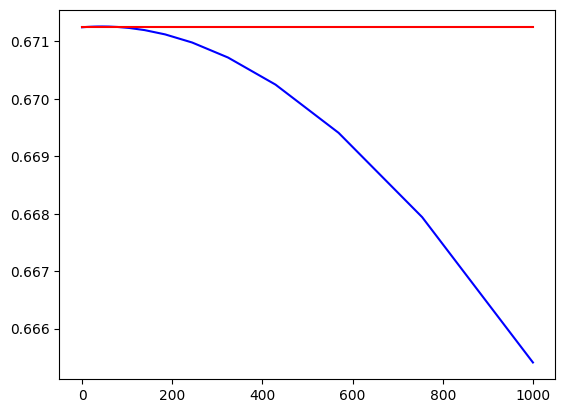

In [163]:
plt.figure()
plt.plot(lambda_range,r2_scores_ridge,color='b')
plt.plot(lambda_range,r2_scores_lasso,color='r')
plt.show()

THE ABOVE CURVE SUGGESTS THAT THE MODEL IS ONLY ABLE TO EXPLAIN 67% OF VARIANCE OF THE DATA, REST 33% IS UNEXPLAINED BECAUSE OUR LINEAR MODEL IS NOT ABLE TO CAPTURE IT.

BEFORE MOVING TO OTHER REGULARIZATION TECHNIQUES AND OTHER MODEL FITTINGS, LET'S TAKE A LOOK AT HOW EACH PREDICTOR IS RELATED TO RESPONSE(MAKING ACCOUNT OF ALL OTHER PREDICTORS) BY USING PARTIAL PREDICTOR PLOTS -->

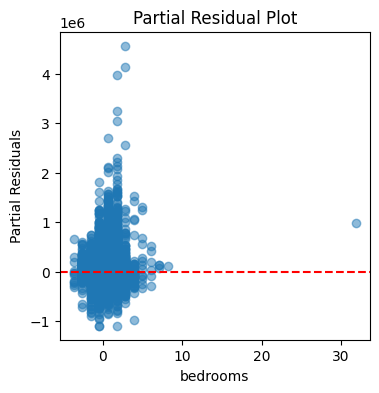

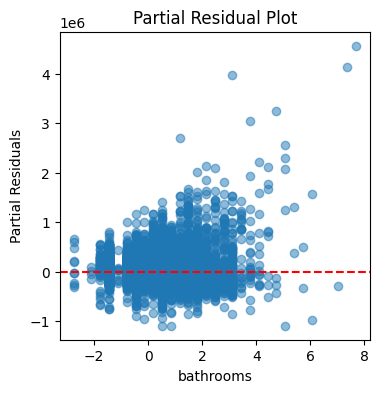

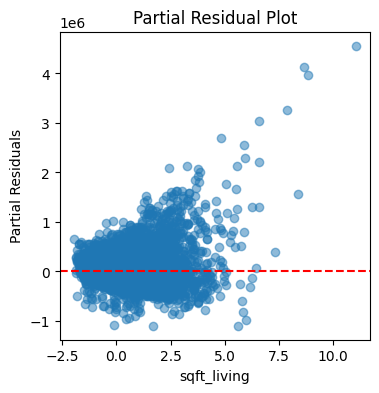

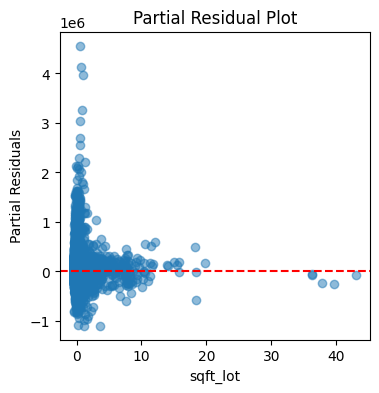

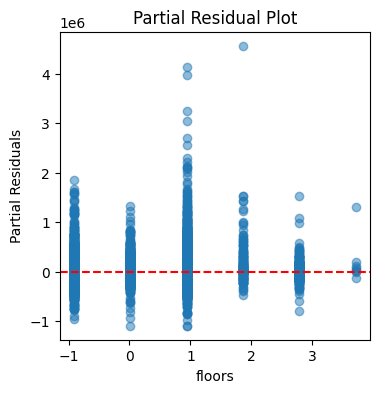

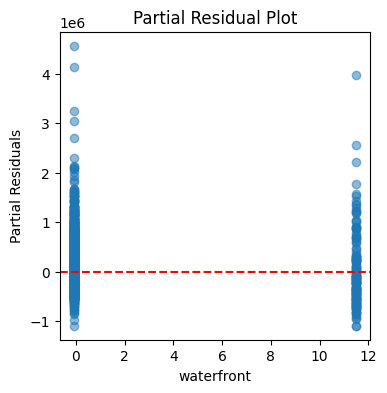

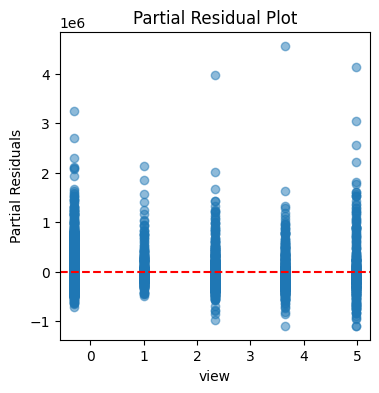

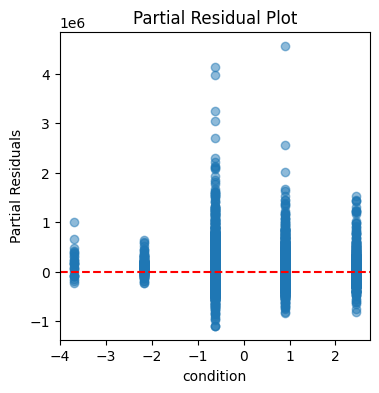

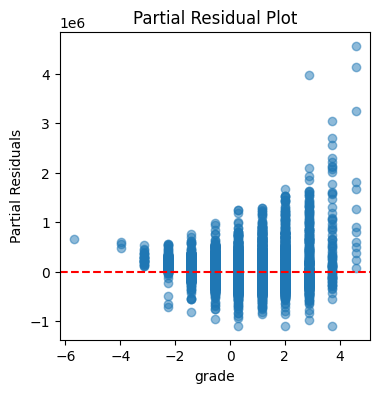

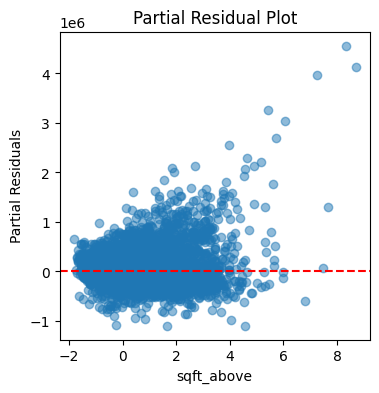

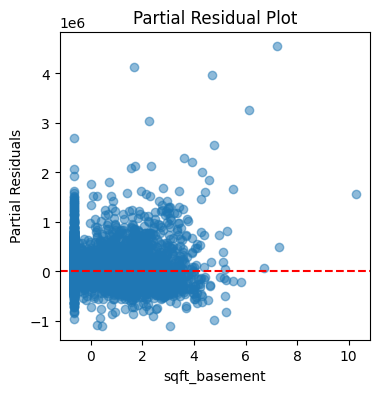

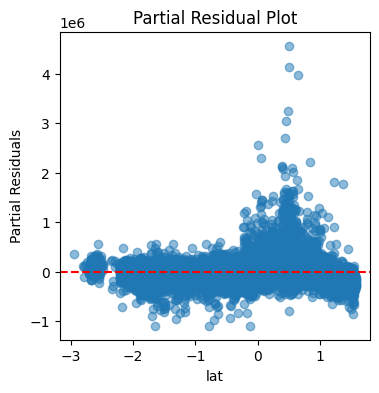

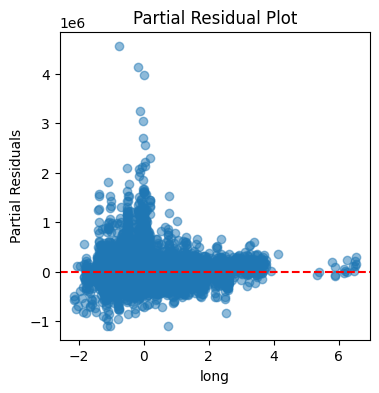

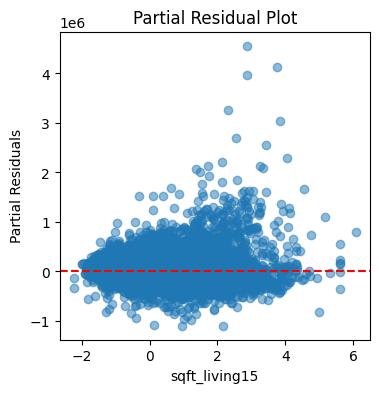

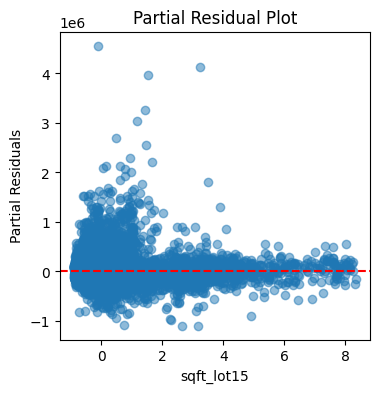

In [63]:
for i in range(1, X_clean_scaled_.shape[1]): 
    partial_residuals = Y_val_clean - Y_pred
    plt.figure(figsize=(4, 4))
    plt.scatter(X_clean_scaled_[:, i], partial_residuals, alpha=0.5)
    plt.xlabel(X[i-1])
    plt.ylabel('Partial Residuals')
    plt.title('Partial Residual Plot')
    plt.axhline(0, color='red', linestyle='--')
    
    m, b = np.polyfit( X_clean_scaled_[:, i], partial_residuals, 1)
    # plt.plot( X_clean_scaled_[:, i], m * X_clean_scaled_[:, i] + b, color='blue')
    
    plt.show()

OKAY SURE VARIOUS THINGS WE CAN EVALUATE FROM HERE IS -->

-->NUMBER OF BEDRROMS IS NOT AS SUCH DIRECTLY RELATED TO RESPONSE AS MANY OTHER FACTORS RESPONSIBLE

-->NUMBER OF BATHROOM SEEMS TO INCREASE PRICE OF HOUSE

-->SQFT_LIVING IS MORE POSITIVELY RELATED, SEEMS OBVIOUS AS WELL

-->NOT MUCH EFFECT WITH NUMBER OF FLOORS, REALLY? WELL A HOUSE IN SMALL AREA CAN HAVE 3 STOREY BUILDING

-->OFCOURSE A HIGH GRADED HOUSE IS COSTLIER

-->A HOUSE WITH A BASEMENT AND ATTIC COSTS MORE

-->HOUSES AT A PARTICULAR GEOMETRIC LOCATION HAVE A HIGEHR PRICE


NOW, WE TRY TO INCREASE THE LEVEL OF OUR MODEL'S INTERPRETABILITY BY MAKING USE OF PARTIAL LEAST SQUARE FITTING

In [52]:
pls = PLSRegression(n_components = 5)
pls.fit(X_clean_scaled,Y_val_clean)
y_pred = pls.predict(X_clean_scaled)
print(r2_score(Y_val_clean,y_pred))

0.6745688933158172


WELL, FOR OBVIOUS REASONS WE WANT ANOTHER MODEL

NON-LINEAR MODEL FITTING
-->POLYNOMIAL REGRESSION

In [53]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly_train = poly.fit_transform(X_clean_scaled)
# test = np.array([3,2.75,1180,5650,1,1,1,5,9,1180,0,47.5112,-122.257,1340,5650])
# test_ = standardize_test_input(test,X_val_clean)
# X_poly_test = poly.transform(test_)
model = LinearRegression()
model.fit(X_poly_train, Y_val_clean)
Y_pred_poly = model.predict(X_poly_train)
print(Y_pred_poly)
print(r2_score(Y_val_clean,Y_pred_poly))

[[351695.625]
 [584319.625]
 [416063.625]
 ...
 [377247.625]
 [463514.625]
 [379103.625]]
0.8011978061050433


IT'S CLEAR THAT ON APPLYING POLYREGRESSION, OUR MODEL HAS BECOME MORE ACCURATE.

BUT THE MAIN IDEA IS ,IT IS DOEN ON TRAINING SET AND EXPLAINED 80% OF VARIANCE. ON SMALL CHANGES IN THE TEST DATA, IT IS INDEED PRODUCING SATISFYING RESULTS, BUT, WHEN THE TESTING SET IS AN OUTLIER FROM THE USUAL TRAINING SET , IT IS PRODUCING MUCH MORE WORSE RESULTS IN PREDICTING THE DATA(ALREADY CHECKED).

SO WHAT WE CAN DO?IF YOU WANT TO DEPLOY THIS ON ANY WEBSITE , WHAT WE CAN DO IS PUT ON A THRESHOLD LIMIT ON THE PREDICTORS FOR ANY OBSERVATION WHILE OUR POLYREGRESSION MODEL IS USED, SUCH THAT THE OBSERVATION DO NOT BECOME AN OUTLIER, IN CASE THE DATA EXCEEDS A THRESHOLD, OUR LINEAR MODEL CAN BE APPLIED SUCH THAT IT DOESNOT PRODUCE A VERY BIASED RESULT AS IT WAS FROM POLYREGRESSION MODEL.

THE BELOW GIVEN GRAPH IS FOR TRAINING SET

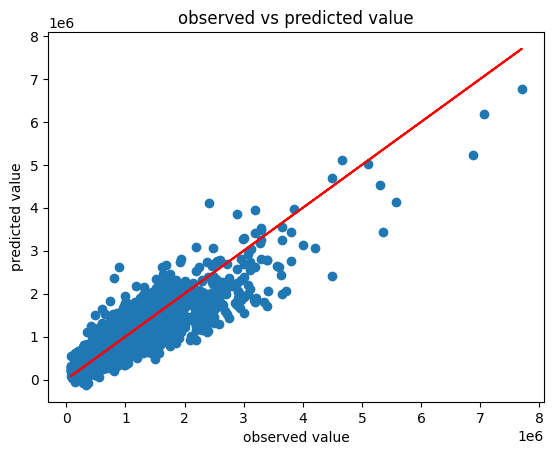

In [54]:
plt.figure()
plt.scatter(Y_val_clean,Y_pred_poly)
plt.plot(Y_val_clean,Y_val_clean,color='r')
plt.title('observed vs predicted value')
plt.xlabel('observed value')
plt.ylabel('predicted value')
plt.show()

BELOW GIVEN ARE 3 CODE SNIPPETS FOR DOING CROSS VALIDATION FOR EACH DEGREE TO IDENTIFY WHICH DEGREE SUITS BEST FOR OUR POLYREGRESSION MODE(DUE TO LACK OF MACHINE COMPUITING RESOURCES, IAM NOT ABLE TO RUN THESE, YOU CAN DO IF YOUR RESOURCES ALLOW)

In [168]:
# def Kfold_cv_poly(folds,x,y,degrees):
#     r2_means=[]
#     for i in range(1,degrees+1):
#         r2_scores = []
#         for j in range(folds):
#              fold_size = int(np.size(y)/folds)
#              val_start = j * fold_size
#              val_end = (j+1) * fold_size
#              X_test = x[val_start:val_end]
#              Y_test = y[val_start:val_end]
#              X_train = np.concatenate([x[:val_start],x[val_end:]],axis = 0)
#              Y_train = np.concatenate([y[:val_start],y[val_end:]],axis = 0)
#              poly = PolynomialFeatures(degree = i ,include_bias = False)
#              X_poly_train = poly.fit_transform(X_train)
#              X_poly_test = poly.fit_transform(X_test)
#              model = LinearRegression()
#              model.fit(X_poly_train,Y_train)
#              Y_clean_poly = model.predict(X_poly_test)
#              r2 = r2_score(Y_test,Y_clean_poly)
#              r2_scores.append(r2)
#         r2_mean = np.mean(r2_scores)
#         r2_means.append(r2_mean)
#     return r2_means
# r2_means = Kfold_cv_poly(10,X_clean_scaled,Y_clean,3)
# def Kfold_cv_poly(folds, x, y, degrees):
#     r2_means = []
    
#     # Initialize KFold
#     kf = KFold(n_splits=folds, shuffle=True, random_state=0)
    
#     for degree in range(1, degrees + 1):
#         r2_scores = []
        
#         # Generate polynomial features for the entire dataset once
#         poly = PolynomialFeatures(degree=degree, include_bias=False)
#         X_poly = poly.fit_transform(x)
        
#         for train_index, test_index in kf.split(x):
#             X_train, X_test = X_poly[train_index], X_poly[test_index]
#             Y_train, Y_test = y[train_index], y[test_index]
            
#             # Fit the model
#             model = LinearRegression()
#             model.fit(X_train, Y_train)
            
#             # Predict and calculate R2 score
#             Y_pred = model.predict(X_test)
#             r2 = r2_score(Y_test, Y_pred)
#             r2_scores.append(r2)
        
#         # Calculate mean R2 score for the current degree
#         r2_mean = np.mean(r2_scores)
#         r2_means.append(r2_mean)
    
#     return r2_means

# Example usage with 10-fold cross-validation and up to degree 10 polynomial features
# r2_means = Kfold_cv_poly(10, X_clean_scaled, Y_clean, 10)
# def Kfold_cv_poly_parallel(folds, x, y, degrees, n_jobs=-1):
#     def compute_fold_r2(i, X_train, Y_train, X_test, Y_test):
#         poly = PolynomialFeatures(degree=i, include_bias=True)
#         X_poly_train = poly.fit_transform(X_train)
#         X_poly_test = poly.transform(X_test)
#         model = LinearRegression()
#         model.fit(X_poly_train, Y_train)
#         Y_pred = model.predict(X_poly_test)
#         return r2_score(Y_test, Y_pred)

#     r2_means = []
#     for degree in range(1, degrees+1):
#         kf = KFold(n_splits=folds, shuffle=True, random_state=42)
#         scores = Parallel(n_jobs=n_jobs)(
#             delayed(compute_fold_r2)(degree, X_train, Y_train, X_test, Y_test)
#             for X_train_idx, X_test_idx in kf.split(x)
#             for X_train, Y_train, X_test, Y_test in [(x[X_train_idx], y[X_train_idx], x[X_test_idx], y[X_test_idx])]
#         )
#         r2_means.append(np.mean(scores))
#     return r2_means

# r2_means = Kfold_cv_poly_parallel(10, X_clean_scaled, Y_val_clean, 3)
# print(r2_means)
# def Kfold_cv_poly_mean(folds, x, y, degrees, cv_splits=10):
#     def compute_fold_r2(degree, X_train, Y_train, X_test, Y_test):
#         poly = PolynomialFeatures(degree=degree, include_bias=True)
#         X_poly_train = poly.fit_transform(X_train)
#         X_poly_test = poly.transform(X_test)
#         model = LinearRegression()
#         model.fit(X_poly_train, Y_train)
#         Y_pred = model.predict(X_poly_test)
#         return r2_score(Y_test, Y_pred)

#     r2_means = np.zeros((degrees, cv_splits))  # Array to store mean R2 for each degree and CV split

#     for degree in range(1, degrees+1):
#         kf_cv = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
#         fold_idx = 0
#         for train_idx, test_idx in kf_cv.split(x):
#             kf = KFold(n_splits=folds, shuffle=True, random_state=42)
#             fold_scores = []
#             for train_idx_inner, test_idx_inner in kf.split(x.iloc[train_idx]):
#                 X_train_inner, X_test_inner = x.iloc[train_idx].iloc[train_idx_inner], x.iloc[train_idx].iloc[test_idx_inner]
#                 Y_train_inner, Y_test_inner = y[train_idx][train_idx_inner], y[train_idx][test_idx_inner]
#                 score = compute_fold_r2(degree, X_train_inner, Y_train_inner, X_test_inner, Y_test_inner)
#                 fold_scores.append(score)
            
#             mean_r2 = np.mean(fold_scores)
#             r2_means[degree-1, fold_idx] = mean_r2
#             fold_idx += 1

#     return np.mean(r2_means, axis=1).tolist()  # Return mean R2 for each degree across all CV splits

# # Example usage
# r2_means = Kfold_cv_poly_mean(10, X_clean_scaled, Y_val_clean, 3, cv_splits=100)
# print(r2_means)

# plt.figure()
# plt.plot(np.arange(1,4),r2_means)
# plt.ylim(0.6,0.9)
# plt.title('degrees vs r2')
# plt.xlabel('degress')
# plt.ylabel('r2 score')
# plt.show()

ITS USUALLY EVEN MORE DIFFICULT TO VISUALIZE POLYREGRESSION MODELS SINCE SO MANY PREDICTORS OUR INVOLVED, ONE WAY TO ANALYSE IT IS BY USING SHAP PLOTS (SHapley ADDITIVE exPLANATIONS)

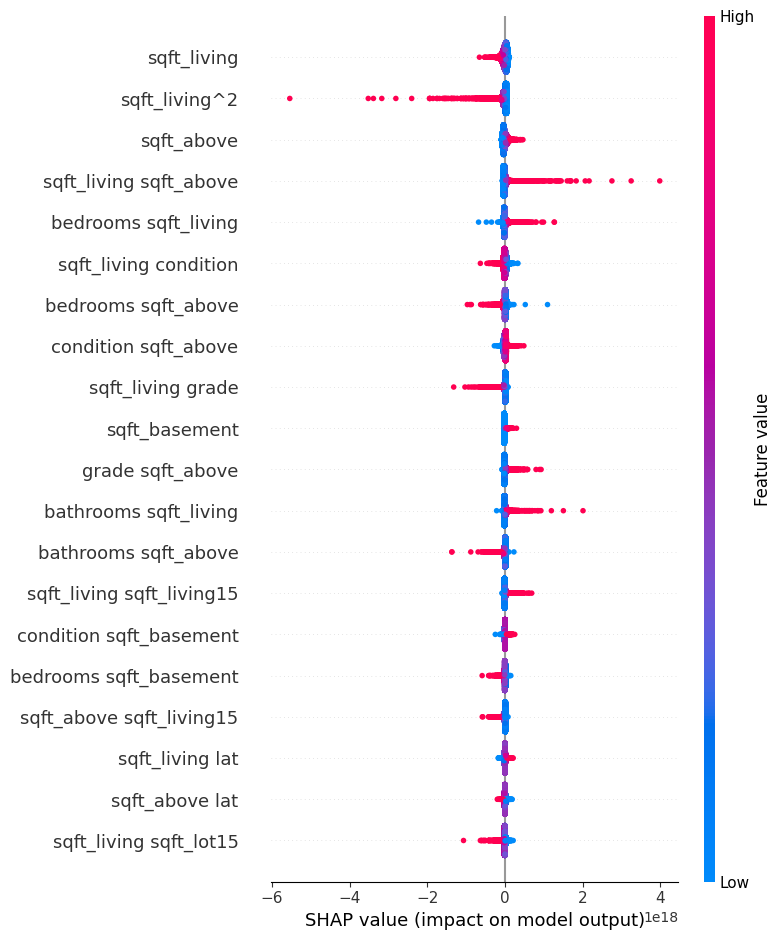

In [55]:
X_clean_scaled.columns = X
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly_train = poly.fit_transform(X_clean_scaled)
X_poly_test = poly.transform(X_clean_scaled)
model = LinearRegression()
model.fit(X_poly_train, Y_val_clean)
Y_pred_poly = model.predict(X_poly_test)
explainer = shap.Explainer(model, X_poly_train)
shap_values = explainer(X_poly_train)
# Plot summary
shap.summary_plot(shap_values, features=X_poly_train, feature_names=poly.get_feature_names_out(),max_display=20)

ONE THING TO KEEP IN MIND IS, WHILE TESTING IN POLYNOMIAL REGRESSION, YOU HAVE TO TUNE YOUR PREDICTOR VALUES CAREFULLY,

IT MIGHT HAPPEN THAT INCREASING YOUR SQFT_LIVING MIGHT DECREASE YOUR PRICE, IT ISN'T OBVIOUS,BUT IT HAPPENS DUE TO INTERACTIONB TERM, YOU HAVE TO TUNE YOUR OTHER PARAMETRS AS WELL ACCORDINGLY FOR DESIRED RESULTS

--DECISION TREES -->

-->RANDOM FORSTS

In [56]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt',random_state = 99)
cv_scores = cross_val_score(model, X_clean_scaled, Y_val_clean.flatten(), cv=kf, scoring='r2')
y_pred_cv = cross_val_predict(model, X_clean_scaled, Y_val_clean.flatten(), cv=kf)
print(r2_score(Y_val_clean,y_pred_cv))

0.8662470103325127


In [57]:
model = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt',random_state = 99,max_depth=5)
model.fit(X_clean_scaled,Y_val_clean.flatten())
test = np.array([3,1,11800,56500,1,0,0,4,9,1180,0,47.5112,-122.257,13400,56500])
test_ = standardize_test_input(test,X_val_clean)
y_pred = model.predict(test_)
print(y_pred)

[1157882.22548215]


C:\Users\sankh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sankh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


INDEED, DECISION TRESS ARE EXCELLENT AT PREDICTING , BUT AT A LOSS OF INTERPRETABILITY

ONE WAY TO INTERPRET IS USING THE IMPORTANCE PLOT-->

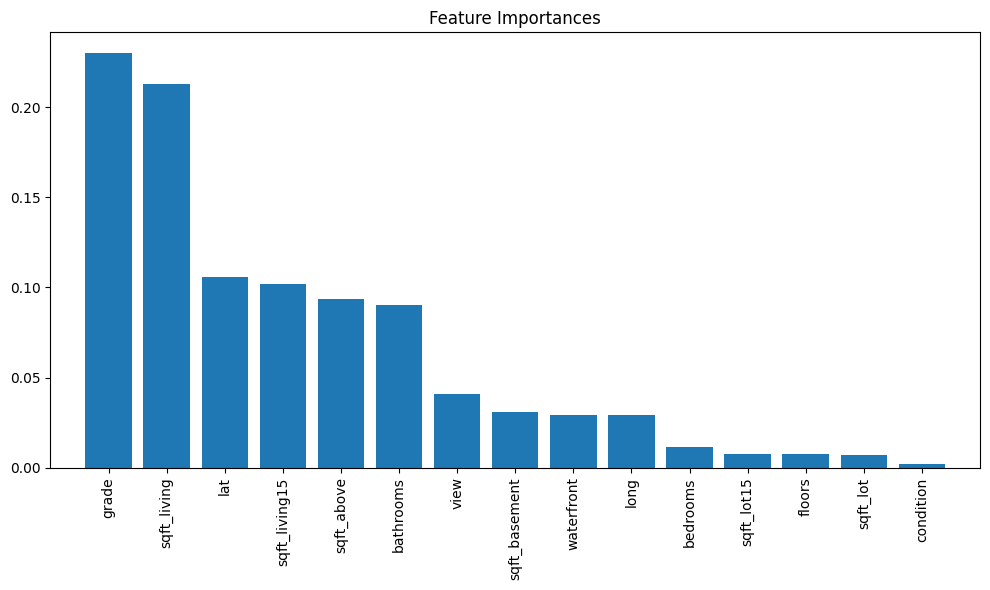

In [58]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(feature_names, importances[indices], align="center")
plt.xticks(range(X_clean_scaled.shape[1]), X_clean_scaled.columns[indices], rotation=90)
plt.xlim([-1, X_clean_scaled.shape[1]])
plt.tight_layout()
plt.show()